# Data Analysis Project

In [43]:
#the below code imports numpy and pandas libraries
import numpy as np
import pandas as pd

In [44]:
#the below code imports matplotlib and seaborn, which will be used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [76]:
#.read_csv uses parsing code to convert tabular data (from a CSV or comma-separated file) into into a DataFrame object. 
#The DataFrame is called df
df = pd.read_csv('911.csv')

In [46]:
#the .info() pandas method below provides a concise summary of the df DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [47]:
#checks the first 3 entries in df
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Data Analysis Questions and Answers

** What are the top 10 zipcodes for 911 calls? **

In [79]:
#Grabs the zip column from df. Specifies value counts off of the zip column 
#In order to just see the top 10 zip codes, we add .head(10)
df['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [49]:
#Grabs the twp column from df. Specifies value counts off of the zip column 
#In order to just see the top 5 zip codes, we add .head(5)
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** How many unique title codes are there in the 'title' column? **

In [80]:
#Calls .unique() which returns an array of all unique titles
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM', 'EMS: ABDOMINAL PAINS',
       'Fire: PUMP DETAIL', 'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE',
       'EMS: MATERNITY', 'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING',
       'EMS: LACERATIONS', 'Fire

In [50]:
#Calls .nunique() which returns the number of unique titles
df['title'].nunique()

110

## Creating new columns

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. The .apply() method is used with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

In [93]:
#First, we grab an example from the title column using .loc and set the example as x.
x = df['title'].loc[0]

In [94]:
#Then we return an example from the title column
x

'EMS: BACK PAINS/INJURY'

In [171]:
# Since the 'title' values are strings, we can use .split by ':' to provide the elements of the list. 
# The first element of the list is 'EMS' which is the element we will work with.
x.split(':')

['EMS', ' BACK PAINS/INJURY']

In [172]:
# Adding [0] grabs the first element off of the list. 
# This gives us the new 'Reason' column data.
x.split(':')[0]

'EMS'

In [99]:
# A lambda expression is used to create a column called 'Reason'
# .apply() method is used on the 'title' column along with the lambda expression to split the title.
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [100]:
y = df['Reason']

In [101]:
y

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
5            EMS
6            EMS
7            EMS
8            EMS
9        Traffic
10       Traffic
11       Traffic
12       Traffic
13       Traffic
14       Traffic
15       Traffic
16           EMS
17           EMS
18           EMS
19       Traffic
20       Traffic
21       Traffic
22          Fire
23       Traffic
24       Traffic
25           EMS
26           EMS
27          Fire
28       Traffic
29       Traffic
          ...   
99462        EMS
99463        EMS
99464        EMS
99465        EMS
99466        EMS
99467        EMS
99468       Fire
99469       Fire
99470        EMS
99471        EMS
99472        EMS
99473        EMS
99474        EMS
99475    Traffic
99476        EMS
99477        EMS
99478    Traffic
99479        EMS
99480        EMS
99481        EMS
99482    Traffic
99483        EMS
99484       Fire
99485    Traffic
99486    Traffic
99487    Traffic
99488    Traffic
99489        E

** What is the most common Reason for a 911 call based off of this new column? **

In [104]:
# Returns the most common reasons for 911 calls. There are only 3 values.
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [103]:
# Returns the most common reason for 911 calls. 
df['Reason'].value_counts().head(1)

EMS    48877
Name: Reason, dtype: int64

** Seaborn countplot **

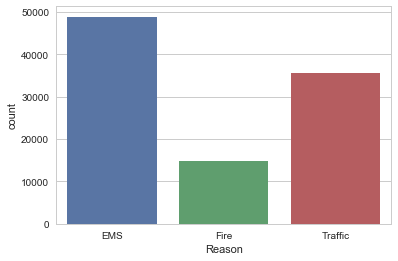

In [105]:
# Uses seaborn to create a count plot of 911 calls by Reason
sns.countplot(x='Reason', data=df)

**Time information **

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
Reason       99492 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


In [110]:
# Returns the data type of the 'timeStamp' column in the dataframe
type(df['timeStamp'].iloc[0])

str

In [173]:
# pd.to_datetime is used to convert the 'timeStamp' string column to a DateTime object.
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [117]:
# Now we have an object
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [115]:
# Calls the hour attribute from a Datetime object
time = df['timeStamp'].iloc[0]
time.hour

17

In [119]:
time.year

2015

In [120]:
time.month

12

In [121]:
time.dayofweek

3

In [130]:
# Creates new 'Hour', 'Month' and 'Day of Week' columns in the dataframe using lambda expression
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [131]:
df['Hour']

0        17
1        17
2        17
3        17
4        17
5        17
6        17
7        17
8        17
9        17
10       17
11       17
12       17
13       17
14       17
15       17
16       17
17       17
18       17
19       17
20       17
21       17
22       18
23       18
24       18
25       18
26       18
27       18
28       18
29       18
         ..
99462     9
99463     9
99464     9
99465     9
99466    10
99467    10
99468    10
99469    10
99470    10
99471    10
99472    10
99473    10
99474    10
99475    10
99476    10
99477    10
99478    10
99479    10
99480    10
99481    10
99482    10
99483    10
99484    10
99485    10
99486    11
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int64

In [176]:
# The new columns labeled 'Hour', 'Month', and 'Day of Week' are created at the end of the dataframe
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [133]:
# Maps the actual string names to the days of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [134]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [135]:
# Day of Week is now an actual string, so it's a little easier to read
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


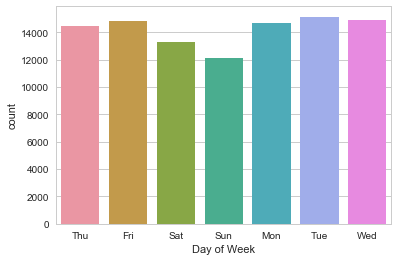

In [138]:
# Seaborn is used to create a countplot of the Day of Week column.
sns.countplot(x='Day of Week', data=df)

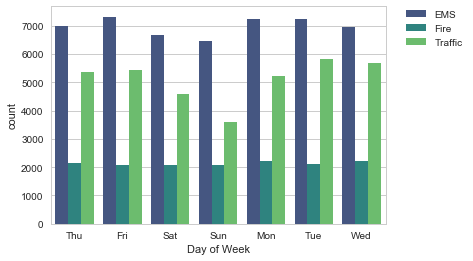

In [139]:
# Seaborn is used to create a countplot of the Day of Week column with the hue based off 'Reason'
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

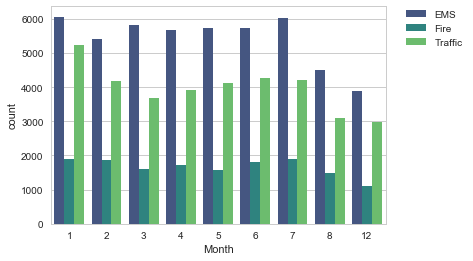

In [60]:
# Countplot for day of the month 
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [62]:
# The plot is missing months 9, 10 and 11
# The missing months can be filled in by plotting it with a line plot that fills in the missing months
# A groupby object called byMonth is created to do this. The count() method is used for aggregation
# The the head() method on this returns dataframe
# This returns a count of every instance of the columns by month
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


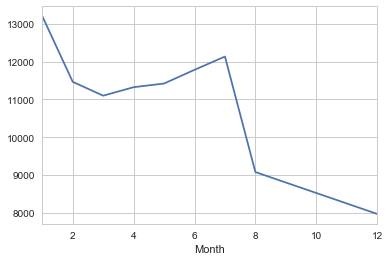

In [141]:
# The below code creates a simple plot off of the dataframe indicating the count of calls per month based on the 'lat' column.
byMonth['lat'].plot()

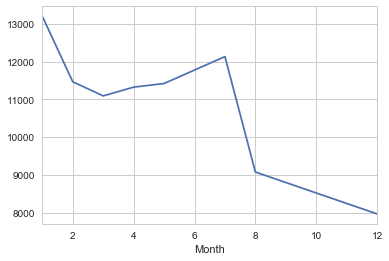

In [63]:
# The below code creates a simple plot off of the dataframe indicating the count of calls per month based on the two column.
byMonth['twp'].plot()

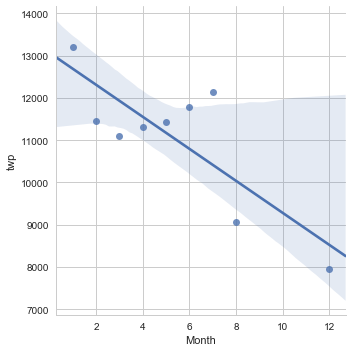

In [64]:
# Seaborn's lmplot() is used to create a linear fit on the number of calls per month. 
# The index is reset to a column. 
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [147]:
# A new column called 'Date' that contains the date from the timeStamp column is created
t = df['timeStamp'].iloc[0]

In [148]:
# timeStamp is a string data type
t

Timestamp('2015-12-10 17:40:00')

In [149]:
# The date() method is called to get a date object. This just shows the date information and does not have the time information.
t.date()

datetime.date(2015, 12, 10)

In [150]:
# .apply() is used along with the .date() method to convert the timeStamp string type to a date data type
df['Date']=df['timeStamp'].apply(lambda t: t.date())

In [145]:
df.Date

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
5        2015-12-10
6        2015-12-10
7        2015-12-10
8        2015-12-10
9        2015-12-10
10       2015-12-10
11       2015-12-10
12       2015-12-10
13       2015-12-10
14       2015-12-10
15       2015-12-10
16       2015-12-10
17       2015-12-10
18       2015-12-10
19       2015-12-10
20       2015-12-10
21       2015-12-10
22       2015-12-10
23       2015-12-10
24       2015-12-10
25       2015-12-10
26       2015-12-10
27       2015-12-10
28       2015-12-10
29       2015-12-10
            ...    
99462    2016-08-24
99463    2016-08-24
99464    2016-08-24
99465    2016-08-24
99466    2016-08-24
99467    2016-08-24
99468    2016-08-24
99469    2016-08-24
99470    2016-08-24
99471    2016-08-24
99472    2016-08-24
99473    2016-08-24
99474    2016-08-24
99475    2016-08-24
99476    2016-08-24
99477    2016-08-24
99478    2016-08-24
99479    2016-08-24
99480    2016-08-24


In [151]:
# The new 'Date' column is appended to the dataframe as the last column.
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [154]:
# The groupby method is applied to the new 'Date' column with the count() aggregate.
# This counts all of the instances per day
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


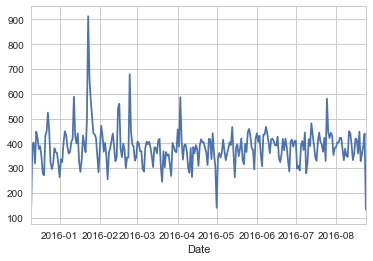

In [157]:
# The groupby method is applied to the new 'Date' column with the count() aggregate to create a plot of counts of 911 calls.
df.groupby('Date').count()['lat'].plot()

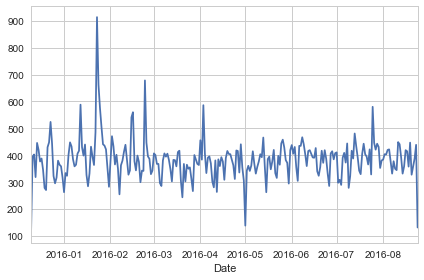

In [153]:
# The groupby method is applied to the new 'Date' column with the count() aggregate to create a plot of counts of 911 calls.
df.groupby('Date').count()['twp'].plot()
# plt.tight_layout() is used to make the x-axis labels look neater
plt.tight_layout()

**This plot is recreated but with three separate plots with each plot representing a Reason for the 911 call**

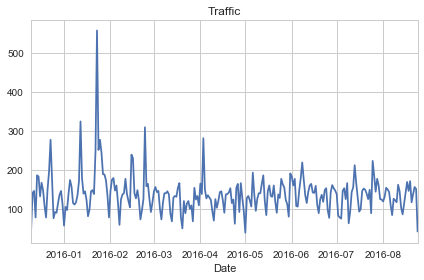

In [158]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

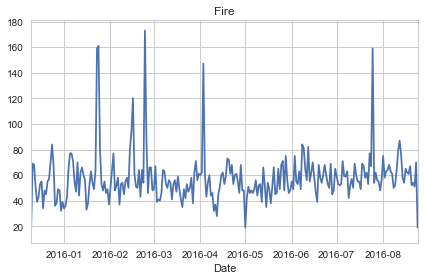

In [159]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

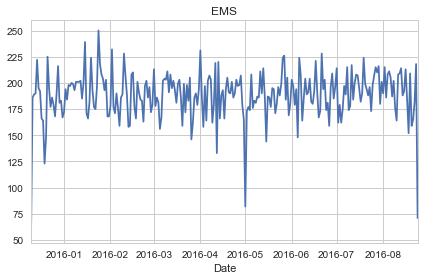

In [160]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

** Heatmaps **

In [161]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


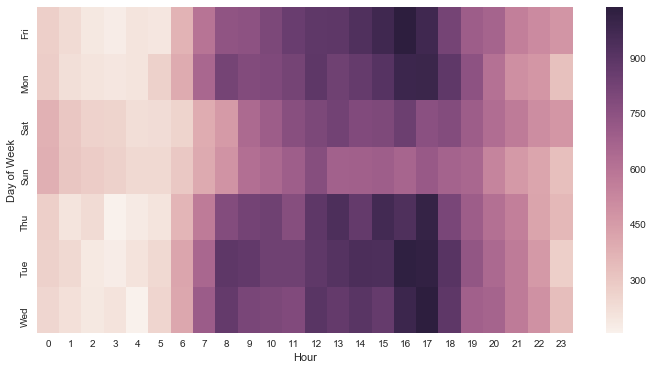

In [162]:
# HeatMap using this new dataframe
# plt.figure makes the figure larger
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

In [182]:
import warnings
warnings.filterwarnings("ignore")

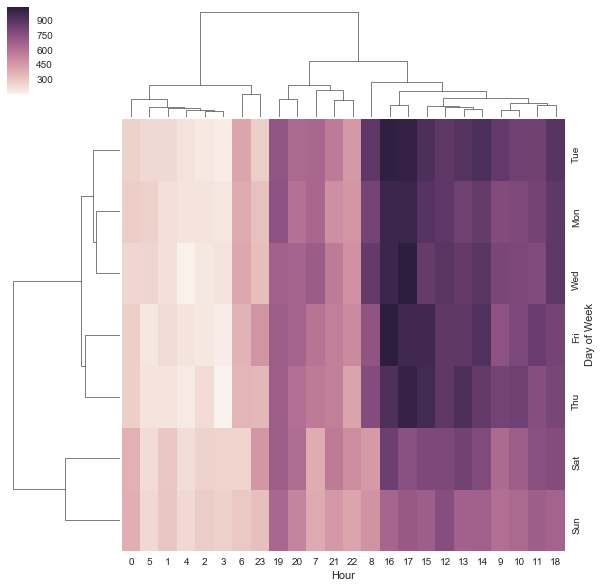

In [183]:
# Clustermap using this dataframe
sns.clustermap(dayHour)


In [73]:
# The same plots and operations, for a DataFrame that shows the Month as the column.
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


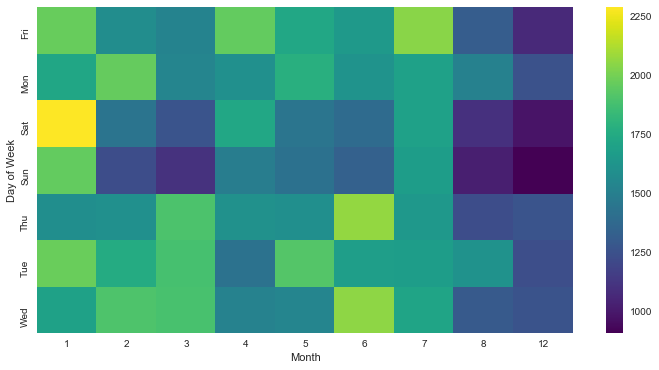

In [74]:
# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

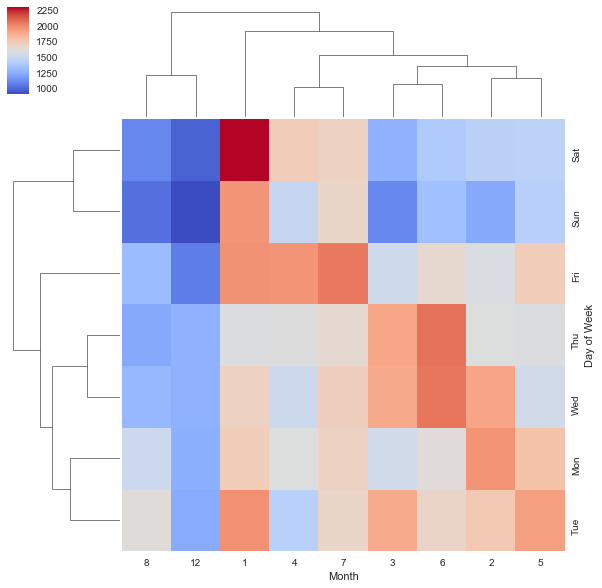

In [184]:
# Clustermap
sns.clustermap(dayMonth, cmap='coolwarm')

## I hope you found the project interesting. Please feel free to contact me with any questions whatsoever.

## Thank you!